Input Samples =  [[0.87 0.97 0.87 0.53 0.23 0.01 0.43 0.4  0.52 0.48 0.56 0.54 0.76 0.71
  0.62 0.43 0.29 0.97 0.33 0.22 0.07 0.98 0.13 0.32 0.07 0.22 0.39 0.9
  0.35 0.98 0.03 0.35 0.38 0.76 0.94 0.32 0.43 0.27 0.8  0.64 0.07 0.6
  0.8  0.03 0.46 0.79 0.99 0.58 0.04 0.45]]
Actual values of y = [[9.48 9.88 9.48 8.12 6.92 6.04 7.72 7.6  8.08 7.92 8.24 8.16 9.04 8.84
  8.48 7.72 7.16 9.88 7.32 6.88 6.28 9.92 6.52 7.28 6.28 6.88 7.56 9.6
  7.4  9.92 6.12 7.4  7.52 9.04 9.76 7.28 7.72 7.08 9.2  8.56 6.28 8.4
  9.2  6.12 7.84 9.16 9.96 8.32 6.16 7.8 ]] 

Actual Parameters = [4] 6 

Loss at 0 th epoch = 50.3148805759068
Loss at 100 th epoch = 0.023393053092890123
Loss at 200 th epoch = 0.005841055029156462
Loss at 300 th epoch = 0.001458463922867687
Loss at 400 th epoch = 0.0003641665767038509
Loss at 500 th epoch = 9.092943164986574e-05
Loss at 600 th epoch = 2.2704339357565874e-05
Loss at 700 th epoch = 5.669088834166386e-06
Loss at 800 th epoch = 1.4155253629518045e-06
Loss at 900 th epoc

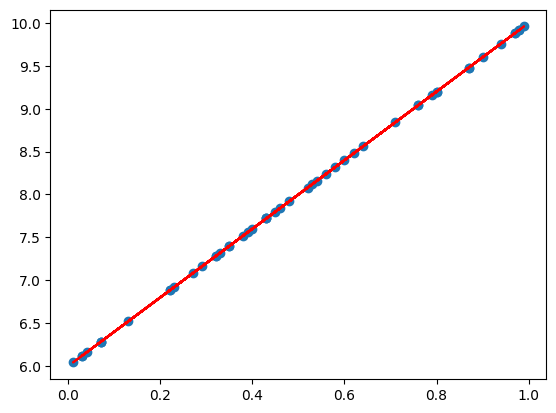

In [3]:
#Linear Regression using single and multiple variables
#Important point: The learning rate is influenced by the number of samples and the values of the samples
##Loss function for Linear regression = Least mean squared (h(x)-y)^(2)/2
import numpy as np
import random
import matplotlib.pyplot as plt
np.random.seed(8)
random.seed(8)
##Class to implement Linear Regression
class LinearRegression:
    def __init__(self,samples,features,learning_rate,epochs,noise):
        self.X_samples = samples              # Number of Samples = self.X_samples
        self.X_features = features            # Number of features = self.X_features
        self.learning_rate = learning_rate    # Learning Rate = self.learning_rate
        self.epochs = epochs                  # Iterations = self.epochs
        self.noise = noise                    # Influence of noise = self.noise 
    
    def XSamples(self,Xshow=0): ## Set show ==1 to display the values of input samples
        ## Create a random Data sample for X using the number of samples and the number of features  
        X_train = np.round(np.random.uniform(0,1,(self.X_samples,self.X_features)),2) ## The values of samples range from 0 -1 and and rounded off to 2 decimal places
        if Xshow == 1:
            print('Input Samples = ',X_train.T)
        return X_train 
    def ySamples(self,X,yshow=0,wshow=0): ## Set show == 1 to diplay the ouput label for the samples
        ## Create the output samples for the input samples.
        ## y = w1x1+w2x2+w3x3+......wnxn+b (Equation of linear Reression)
        ## Use random weight values to obtain the values of [w1,w2,w3,...,wn] for the output y
        temp = np.zeros(X.shape)                ## Create temporary numpy array with shape of X
        w = []
        for i in range(self.X_features):
            w.append(random.randint(1,10))      ## w = random variable = random_value(between 1-10)
            temp[:,i] = w[i]*X[:,i]                 ## Multiply the values of each column of X with w(wiXi)
        b = np.array(random.randint(1,10))       ##b = (random value between 1-10)
        y = np.array([np.sum(temp,axis=1)]).T+b  ## y = summation(wixi) + b
        y_actual = y+self.noise*np.random.random((y.shape)) ## Add some noise to the value of y
        if yshow==1:
            print('Actual values of y =',y_actual.T,'\n')
        if wshow==1:
            print('Actual Parameters =',w,b,'\n')
        return y_actual

    def forwardPropagation(self,X,w,b):
        ##Calcluate the value of linear regression variable for training
        ## z = Xw+b - Equation of the regression variable
        return np.dot(X,w.T)+b
    
    def derivative(self,X,y,z):
         ##Find the derivatives for back propagation
        ## dL = dL/dz, dz = dz/dw
        ## dL/dw = (dL/dz)*(dz/dw)
        ## dL/db = (dl/dz)*(dz/db)
        dL = (y-z)/self.X_samples
        dz = X
        return (dL,dz)
    
    def backwardPropagation(self,dL,dz):
        ##Back propagation to get dw = dJ/dw and db = dJ/db
        #print(dJ.shape,dz_w.shape,dz_b.shape)
        dw = np.dot(dL.T,dz)
        # print(dw.shape)
        db = np.sum(dL)
        # print(db.shape)
        return (dw,db)
    
    def randomWeightsandBias(self,X):
        ##Initialize the weights and bias to any random values between -1 to 1
        w = np.random.uniform(-1,1,(1,X.shape[1]))
        b = np.random.uniform(-1,1,(1,1))
        return (w,b)
    
    ##Train the model
    def train_model(self,show_loss=0,Xshow=0,yshow=0,wshow=0):  ##Pass the show values to show the losses,inputs,output labels and weights
        X = self.XSamples(Xshow)                                ##Get the input values
        y = self.ySamples(X,yshow=yshow,wshow=wshow)            ##Get output values corresponding to input for linear regression
        (w,b) = self.randomWeightsandBias(X)                    ##Get the random weights and bias values
        ##Training the model over epochs number of iterations
        for i in range(self.epochs):
            z = self.forwardPropagation(X,w,b)                  ##Calculate thw regression variable after each iterations
            if i%100 == 0 and show_loss==1:                     ##Set show_loss == 1 to display the loss after certain iterations
                loss = np.sum(np.square(y-z))/self.X_samples
                print('Loss at',i,'th epoch =',loss)            ##Print the loss values after 100 iterations
            (dL,dz) = self.derivative(X,y,z)                    ##Derivativecs for back propagations
            (dw,db) = self.backwardPropagation(dL,dz)                 ##Get dw and db

            w = w+self.learning_rate*dw                         ##Update weights after each iteration
            b = b+self.learning_rate*db                         ##Update bias after each iteration
        print('Learned Parameters =',w,b)                                              ##Print final weights and bias values
        if self.X_features == 1:                                ##Plot graph if only one feature 
            z = np.ravel(w*X+b)
            plt.scatter(np.ravel(X),y)
            plt.plot(np.ravel(X),z,color = 'red')

##Instantiate the object
lr = LinearRegression(samples=50,features=1,
                      learning_rate=0.1,
                      epochs=5000,noise=0)
lr.train_model(show_loss=1,Xshow=1,yshow=1,wshow=1)